<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/breast_cancer_09_12_19_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**1.   모듈 불러오기**




In [ ]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 

plt.rc('font',family='Malgun Gothic')

**2. 데이터 불러오기**





In [ ]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
cancer.target=np.where(cancer.target==0,1,0)

**3. 데이터 전처리하기**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target, 
                                               test_size=0.3, random_state=2021)
normalizer =StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

**4. 로지스틱 회귀모델 구축하기**
#####**4.1 모델학습하기**

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

#####**4.2 $ \beta $ 확인하기**



*   서론
> 실습내용 1

> #### 로지스틱 회귀모델 ####


$\boxed{
logit=\log(Odds)=\log(\frac{P(Y=1)}{1-P(Y=1)})=\beta_0 +\sum_{k=1 {\sim} 30} \beta_k X_k} $

>>>>># $ \large{\Downarrow} $

*  $\beta$: $X_k$가   1단위   증가했을 때   logit 값의 변화
*  $\beta >0$ $\rightarrow$ Odds가  1이상  증가 $\rightarrow$ $P(Y=1)$가  급증  $\rightarrow$ risky 
*  $\beta$ $\le 0$ $\rightarrow$ Odds가 1미만  증가 $\rightarrow$ $P(Y=0)$가   급증  $\rightarrow$ protective 










In [ ]:
column_name =['cost']+cancer.feature_names.tolist()
beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)
interpret = np.where(beta>0, 'risky','protective')#np.where()

beta_analysis = pd.DataFrame(np.c_[beta,odds, interpret], index=column_name, 
                             columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
cost,-0.42,0.66,protective
mean radius,0.54,1.72,risky
mean texture,0.92,2.51,risky
mean perimeter,0.55,1.73,risky
mean area,0.56,1.75,risky
mean smoothness,0.13,1.14,risky
mean compactness,-0.48,0.62,protective
mean concavity,0.93,2.53,risky
mean concave points,0.72,2.05,risky
mean symmetry,0.23,1.26,risky


#####**4.3 Test data 예측하기**

In [ ]:
model.predict_proba(X_test)

array([[9.99587046e-01, 4.12953680e-04],
       [9.99985165e-01, 1.48350838e-05],
       [9.92817867e-01, 7.18213277e-03],
       [2.53352894e-13, 1.00000000e+00],
       [9.99986549e-01, 1.34505123e-05],
       [9.81298434e-02, 9.01870157e-01],
       [9.80024204e-07, 9.99999020e-01],
       [9.99932732e-01, 6.72677815e-05],
       [8.15117335e-05, 9.99918488e-01],
       [9.99995214e-01, 4.78559272e-06],
       [9.99999649e-01, 3.51231679e-07],
       [6.98821879e-06, 9.99993012e-01],
       [9.89324333e-01, 1.06756670e-02],
       [5.05948740e-04, 9.99494051e-01],
       [9.99274489e-01, 7.25511212e-04],
       [9.99218536e-01, 7.81464092e-04],
       [9.37761744e-01, 6.22382562e-02],
       [9.99971984e-01, 2.80156564e-05],
       [9.99964918e-01, 3.50820533e-05],
       [1.03711710e-03, 9.98962883e-01],
       [9.24921333e-01, 7.50786674e-02],
       [9.78028441e-01, 2.19715590e-02],
       [2.99663721e-04, 9.99700336e-01],
       [9.94848393e-01, 5.15160717e-03],
       [9.998572

In [ ]:
Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))
P_1=1/(1+np.exp(-Xbeta))
pd.DataFrame(np.concatenate([P_1,model.predict_proba(X_test)[:,1].reshape(-1,1)],
                            axis=1),columns=['직접','패키지'])

,직접,패키지
0,0.000409,0.000413
1,0.000014,0.000015
2,0.007251,0.007182
3,1.000000,1.000000
4,0.000013,0.000013
...,...,...
166,0.000223,0.000225
167,0.000090,0.000089
168,0.008879,0.008804
169,0.168902,0.169033


#####**4.4 성능 예측하기**


*   cutoff 값을 변화시키면서 accuracy 성능관찰 




In [ ]:
Cut_off=np.linspace(0.01,0.99,10)
for cutoff in Cut_off:
    y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
    acc=accuracy_score(y_true=y_test, y_pred=y_pred)
    recall=recall_score(y_true=y_test, y_pred=y_pred)
    precision=precision_score(y_true=y_test, y_pred=y_pred)
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}", sep=' ')

정확도:0.83 민감도:0.98 정밀도:0.69 cut off:0.01
정확도:0.94 민감도:0.97 정밀도:0.87 cut off:0.12
정확도:0.95 민감도:0.97 정밀도:0.91 cut off:0.23
정확도:0.96 민감도:0.95 정밀도:0.94 cut off:0.34
정확도:0.96 민감도:0.94 정밀도:0.95 cut off:0.45
정확도:0.97 민감도:0.94 정밀도:0.98 cut off:0.55
정확도:0.96 민감도:0.92 정밀도:0.98 cut off:0.66
정확도:0.96 민감도:0.91 정밀도:1.00 cut off:0.77
정확도:0.95 민감도:0.88 정밀도:1.00 cut off:0.88
정확도:0.92 민감도:0.78 정밀도:1.00 cut off:0.99


roc curve 그리기 

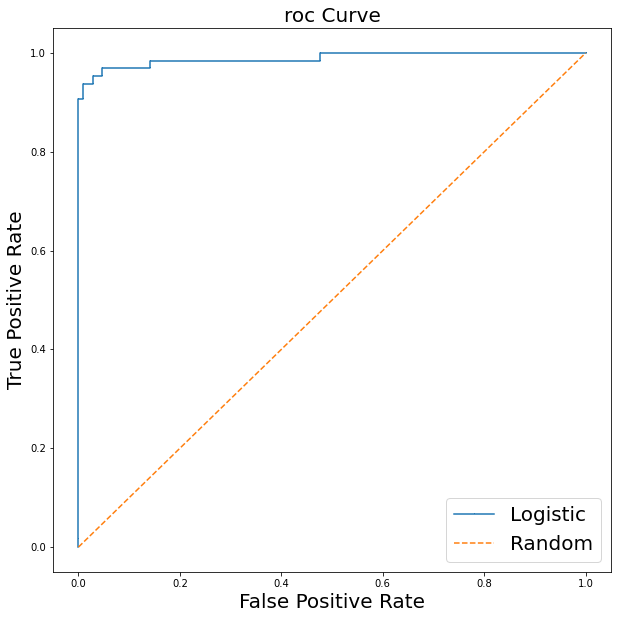

In [ ]:
proba=model.predict_proba(X_test)[:,1]
model_fpr, model_tpr, threshold1=roc_curve(y_test, proba)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

plt.figure(figsize=(10,10))
plt.plot(model_fpr, model_tpr, marker=',', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.legend(fontsize=20)

plt.title("roc Curve",size=20)
plt.show()

